In [21]:
import numpy as np
import sys
import matplotlib.pyplot as plt

def f(x):  # Função de exemplo

    return x*np.log(x) -1


### Bissecção:

def bissec(a, b, erro, zero):
    k = 1

    while (b-a) > erro:
        E = (b+a)/2
        if (f(a) < zero and f(b) > zero and f(E) > zero) or (f(a) > zero and f(b) < zero and f(E) < zero):
            b = E
            print(f'Iteração {k} ; x = {E} ; f(x) = {f(E)}')
            k += 1
        elif (f(a) < zero and f(b) > zero and f(E) < zero) or (f(a) > zero and f(b) < zero and f(E) > zero):
            a = E
            print(f'Iteração {k} ; x = {E} ; f(x) = {f(E)}')
            k += 1
        else:
            break
    
    return E


### Newton-Raphson

def df(x): #Derivada de f(x)

    return 1 + np.log(x)

def phif(x): #Função phi(x) do MNR

    return x - f(x)/df(x)

def newton_raphson(x0, erro):
    k = 0

    if abs(f(x0)) < erro:
        k += 1
        print(f'Iteração {k} ; x = {x0} ; f(x) = {f(x0)}')
    else:
        k += 1
        while True:
            x = phif(x0)
            print(f'Iteração {k} ; x = {x} ; f(x) = {f(x)}')
            
            if abs(f(x)) < erro or abs(x-x0) < erro:
                break

            x0 = x
            k += 1
    
    return x

    
# Método das Secantes:

def phisf(x0, x): # função phi(x) do MNR com a derivada calculada numericamente
    df = (f(x) - f(x0))/(x-x0)
    return x - f(x)/df

def secantes(a, b, erro):
    x0 = a
    x = b
    k = 0

    if abs(f(x0)) < erro:
        k += 1
        print(f'Iteração {k} ; x = {x0} ; f(x) = {f(x0)}')
    else:
        k += 1
        while True:
            x = phisf(x0, x)
            print(f'Iteração {k} ; x = {x} ; f(x) = {f(x)}')

            if abs(f(x)) < erro or abs(x-x0) < erro:
                break

            m = (x + x0)/2

            if (f(x0) < 0 and f(x) > 0 and f(m) > 0) or (f(x0) > 0 and f(x) < 0 and f(m) < 0):
                x = m
            elif (f(x0) < 0 and f(x) > 0 and f(m) < 0) or (f(x0) > 0 and f(x) < 0 and f(m) > 0):
                x0 = m

            k += 1
    
    return x

C:\Users\alecn\AppData\Local\Temp\ipykernel_2528\334485218.py:7: RuntimeWarning: invalid value encountered in log
  return x*np.log(x) -1


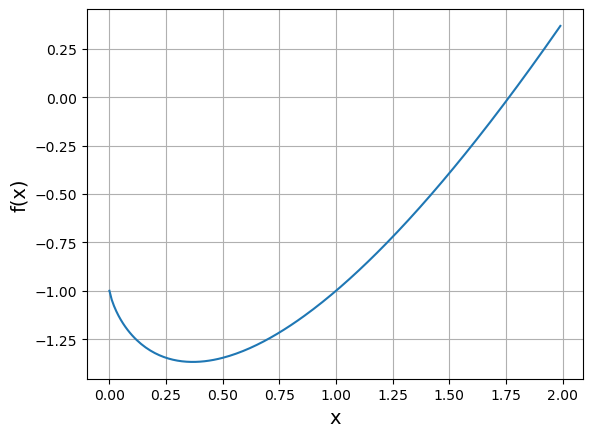

In [6]:
#Plotar gráfico de f(x):
start = int(input('Qual o x de início? '))
end = int(input('Qual o x final?' ))
pres = int(input('Qual a precisão? '))

X = list()

max = abs(start-end)*pres
x = start
for i in range(1, max+1):
    X.append(x)
    x += 1/pres

Y = [f(i) for i in X]

plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)

plt.plot(X,Y)
plt.grid()
plt.show()

In [22]:
# Teste
raiz = bissec(1.5, 2.0, 0.000001, 0)
print(raiz)

Iteração 1 ; x = 1.75 ; f(x) = -0.020672371113010346
Iteração 2 ; x = 1.875 ; f(x) = 0.1786412364169514
Iteração 3 ; x = 1.8125 ; f(x) = 0.07790663279088061
Iteração 4 ; x = 1.78125 ; f(x) = 0.02834299396827955
Iteração 5 ; x = 1.765625 ; f(x) = 0.0037661733570557576
Iteração 6 ; x = 1.7578125 ; f(x) = -0.008470460046244743
Iteração 7 ; x = 1.76171875 ; f(x) = -0.0023564740022450348
Iteração 8 ; x = 1.763671875 ; f(x) = 0.000703768212621636
Iteração 9 ; x = 1.7626953125 ; f(x) = -0.0008266234107535686
Iteração 10 ; x = 1.76318359375 ; f(x) = -6.149520932019481e-05
Iteração 11 ; x = 1.763427734375 ; f(x) = 0.0003211196014274442
Iteração 12 ; x = 1.7633056640625 ; f(x) = 0.00012980797070527572
Iteração 13 ; x = 1.76324462890625 ; f(x) = 3.415532431905177e-05
Iteração 14 ; x = 1.763214111328125 ; f(x) = -1.3670206598703771e-05
Iteração 15 ; x = 1.7632293701171875 ; f(x) = 1.0242492836320949e-05
Iteração 16 ; x = 1.7632217407226562 ; f(x) = -1.7138733873212075e-06
Iteração 17 ; x = 1.76322

In [7]:
import sympy as sp
sp.init_printing(order='grlex')

t, omega_0, omega, m, F0 = sp.symbols('t, omega_0, omega, m, F_0')

x = sp.Function('x')

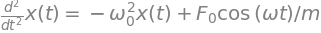

In [8]:
eqx = sp.Eq(x(t).diff(t,2), -(omega_0**2)*x(t) + F0*sp.cos(omega*t)/m)
eqx

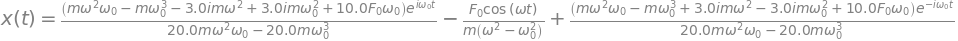

In [9]:
sol = sp.dsolve(eqx, ics={x(0):0.1, x(t).diff(t,1).subs(t,0): 0.3})
sol

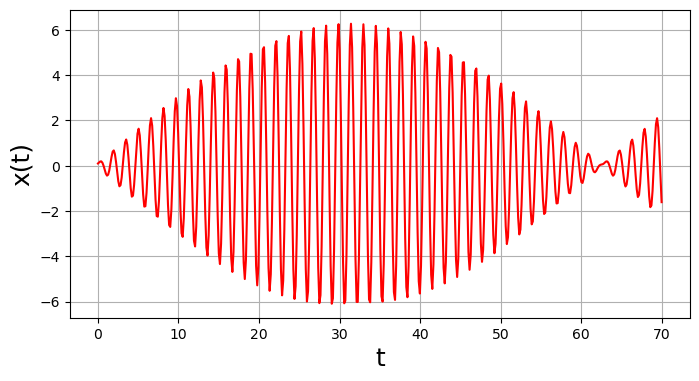

In [23]:
#Plot de gráficos ao estilo sympy:

tl = np.linspace(0,70,500)

x_l = sp.lambdify(t, sol.rhs.subs({m:2, F0:5, omega_0:4, omega:4.1}), "numpy")
Xp = x_l(tl).real

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(tl, Xp, color='red', label='Posição')
ax.set_ylabel('x(t)', fontsize=18)
ax.set_xlabel('t', fontsize=18)
plt.grid()
plt.show()

In [ ]:
#Resolver problema no sympy do retornar de uma lista de soluções:

sol = list()
sol = sol[0] if type(sol) is list else sol